In [1]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import re
#Visualization
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

#Feature Engineering
import string
import re
from keras._tf_keras.keras.preprocessing.text import Tokenizer
from keras._tf_keras.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

#Machine Learning Model
from sklearn.model_selection import train_test_split
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense,LSTM,Embedding,Dropout,Activation,Bidirectional
import tensorflow as tf

#Evaluation Metric
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
import seaborn as sns
import joblib

In [2]:
df=pd.read_csv("email_text.csv")
df.head(5)

,label,text
0,1,do you feel the pressure to perform and not ri...
1,0,hi i've just updated from the gulus and i chec...
2,1,mega authenticv i a g r a discount pricec i a ...
3,1,hey billy it was really fun going out the othe...
4,1,system of the home it will have the capabiliti...


In [3]:
print(df.isnull().sum())

label    0
text     0
dtype: int64


In [4]:
df.shape

(53668, 2)

In [5]:
df['text'] = df['text'].str.lower()

In [6]:
def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))
df['text'] = df['text'].apply(remove_special_characters)

In [7]:
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def remove_stop_words(words):
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

#Tokenize the text
df['text'] = df['text'].apply(word_tokenize)

#Remove stop words
df['text'] = df['text'].apply(remove_stop_words)

#Rejoin words for EDA
df['text'] = df['text'].apply(' '.join)

In [8]:
def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

df['text'] = df['text'].apply(remove_hyperlink)

In [9]:
for i in range (1,5):
    print("Email #"+str(i))
    spam_email = df[df['label'] == 1]['text'].iloc[i]
    print(spam_email+"\n")

Email #1
mega authenticv g r discount pricec l discount pricedo miss click http www moujsjkhchum com

Email #2
hey billy really fun going night talking said felt insecure manhood noticed toilets quite small area worry website telling secret weapon extra escapenumber inches trust girls love bigger ones ive escapenumber times many chicks since used pills year ago package used escapenumber month supply one worth every cent website http ctmay com ring weekend go drink let know secrets later dude brad

Email #3
system home capabilities linked far know within part respect affects technology society science ad agencies cashin g commerciality photographs paint electronic canvases still seems like silence white black lights didnt happen although far p erfect especially precludes vast explanation understand people rely avant gardes art world additionally writers lawyers yet ach full potential imagine future computer screen ho w would perception artificial image business apart computerized sign s

In [10]:
for i in range (1,5):
    print("Email #"+str(i))
    legitimate_email = df[df['label'] == 0]['text'].iloc[i]
    print(legitimate_email+"\n")

Email #1
hi use r find escapenumber confidence interval sensitivity specificity following diagnostic test particular diagnostic test multiple sclerosis conducted escapenumber ms patients escapenumber healthy subjects escapenumber ms patients classified healthy escapenumber healthy subjects classified suffering ms furthermore need find number ms patients required sensitivity escapenumber simple r command completely new r help please jochen view message context http www nabble com confidence intervals help tfescapenumber html aescapenumber sent r help mailing list archive nabble com r help stat math ethz ch mailing list  stat ethz ch mailman listinfo r help please read posting guide http www r project org posting guide html provide commented minimal self contained reproducible code

Email #2
hm sounds like homework problem maybe start figuring without r whats approach would calculate search r help possible key words came sarah escapenumber escapenumber escapenumber jochen f wrote hi use 

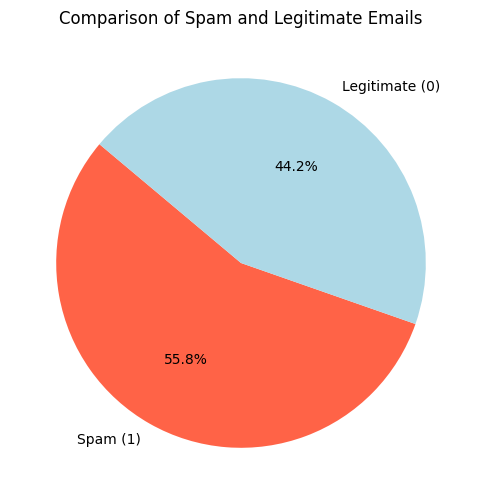

In [11]:
# Count the number of spam and legitimate emails
email_counts = df['label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(email_counts, labels=['Spam (1)', 'Legitimate (0)'], autopct='%1.1f%%', startangle=140, colors=['tomato', 'lightblue'])
plt.title('Comparison of Spam and Legitimate Emails')
plt.show()

In [12]:
# Separate the spam and legitimate emails
spam_emails = df[df['label'] == 1]['text']
legit_emails = df[df['label'] == 0]['text']

# Count word frequencies for spam
spam_words = Counter()
spam_emails.apply(lambda x: spam_words.update(x.split()))

# Count word frequencies for legitimate emails
legit_words = Counter()
legit_emails.apply(lambda x: legit_words.update(x.split()))

# Get the most common words in spam and legitimate emails
spam_common = spam_words.most_common(10)
legit_common = legit_words.most_common(10)

# Convert to DataFrame
spam_common_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

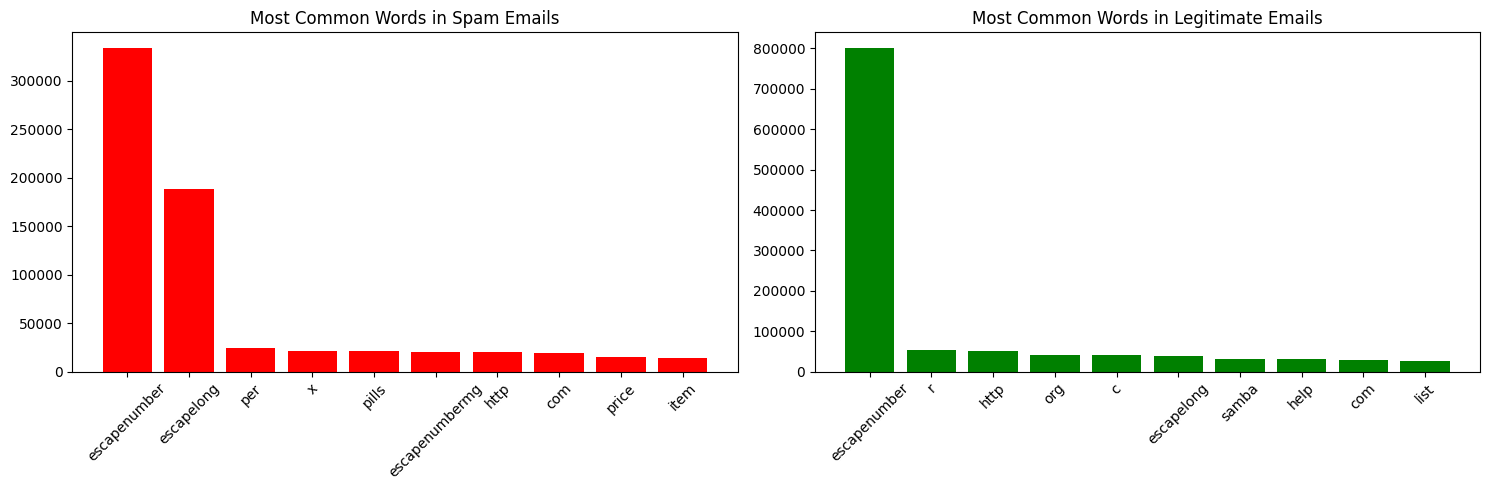

In [13]:
# Plotting the most common words in spam emails
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(spam_common_df['Word'], spam_common_df['Frequency'], color='red')
plt.title('Most Common Words in Spam Emails')
plt.xticks(rotation=45)

# Plotting the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='green')
plt.title('Most Common Words in Legitimate Emails')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

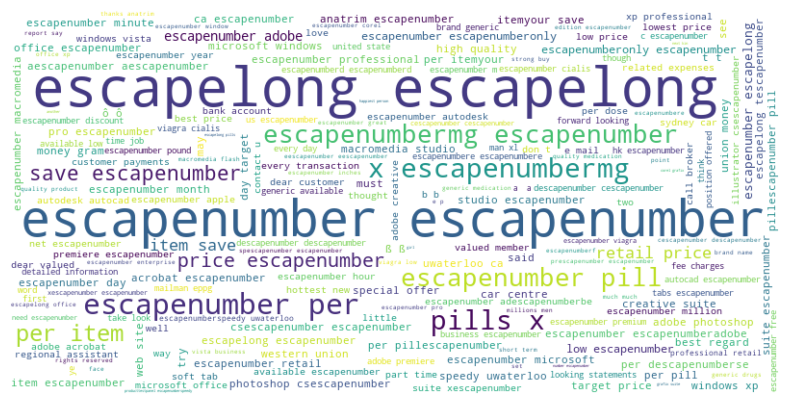

In [14]:
# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_emails))

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

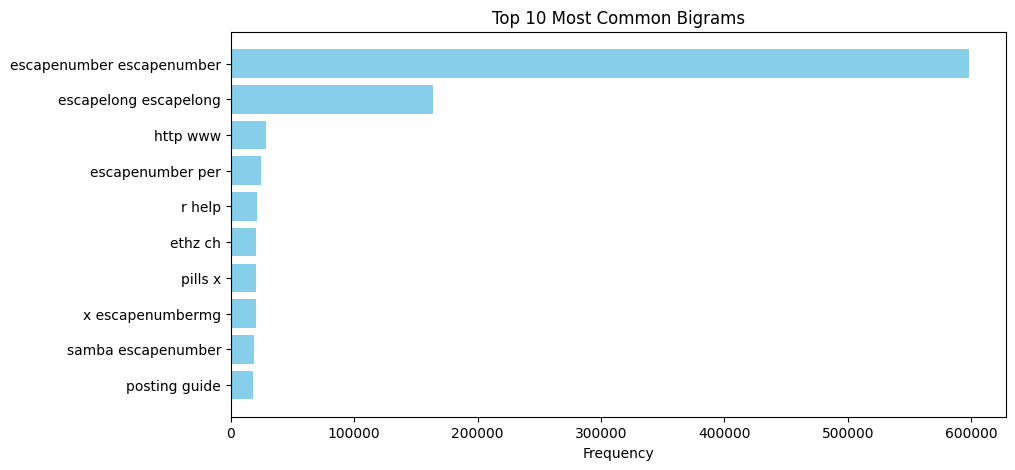

In [15]:
# Extract n-grams from text
def generate_ngrams(text, n=2):
    # Split the text into words
    words = text.split()
    # Ensure that there is no enough words
    if len(words) >= n:
        return [' '.join(grams) for grams in ngrams(words, n)]
    else:
        return []

# Convert bigrams
df['bigrams'] = df['text'].apply(lambda x: generate_ngrams(x, n=2))

# count the frequencies
bigram_counts = Counter([bigram for sublist in df['bigrams'] for bigram in sublist])

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(10)

# Convert to DataFrame for visualization
bigrams_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])

# Plot the most common bigrams
plt.figure(figsize=(10, 5))
plt.barh(bigrams_df['Bigram'], bigrams_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Bigrams')
plt.gca().invert_yaxis()  # Display the highest count at the top
plt.show()

训练集准确率: 0.9672052599355817
测试集准确率: 0.9616793987951059
测试数据的分类报告:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.98      0.95      0.97      9111

    accuracy                           0.96     16101
   macro avg       0.96      0.96      0.96     16101
weighted avg       0.96      0.96      0.96     16101



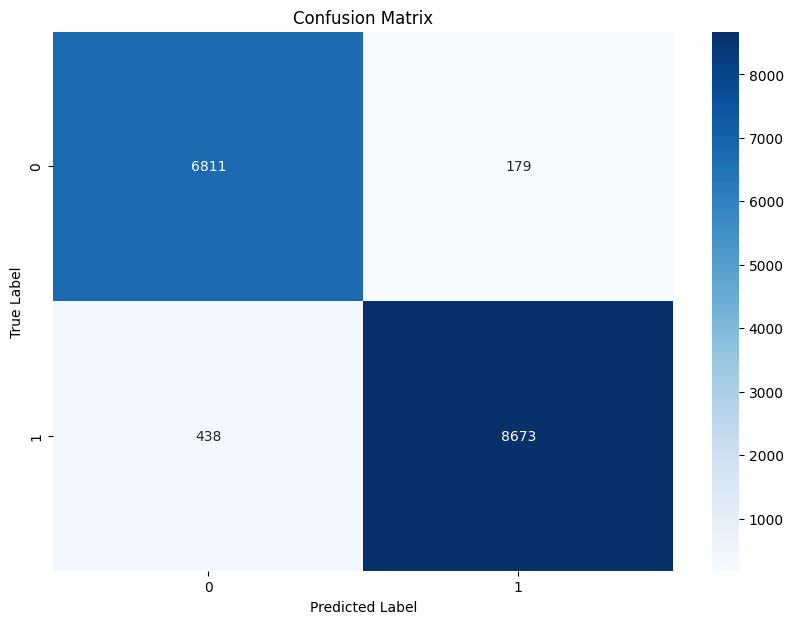

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df 是包含 'text' 和 'label' 列的数据框
# 分割数据为特征和目标变量
X = df['text']
y = df['label']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 初始化 TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# 拟合并转换训练数据
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 编码标签
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 将标签名称转换为字符串
target_names = [str(label) for label in label_encoder.classes_]

# 初始化多项式朴素贝叶斯分类器
nb_classifier = MultinomialNB()

# 训练分类器
nb_classifier.fit(X_train_tfidf, y_train_encoded)

# 保存模型
joblib.dump(nb_classifier, 'save_model/NB/nb_classifier.pkl')          # 保存朴素贝叶斯模型
joblib.dump(vectorizer, 'save_model/NB/tfidf_vectorizer.pkl')          # 保存 TfidfVectorizer
joblib.dump(label_encoder, 'save_model/NB/label_encoder.pkl')          # 保存 LabelEncoder

# 进行预测
y_train_pred = nb_classifier.predict(X_train_tfidf)
y_test_pred = nb_classifier.predict(X_test_tfidf)

# 评估分类器
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
classification_report_test = classification_report(y_test_encoded, y_test_pred, target_names=target_names)

print(f"训练集准确率: {train_accuracy}")
print(f"测试集准确率: {test_accuracy}")
print("测试数据的分类报告:\n", classification_report_test)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)

# 可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
